<h1>Predicting Diamond Prices</h1>
<h2>Phase 2: Statistical Modelling</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>
<h5>Name: Frandom Leo Inovejas (s3923193)</h5>

## Table of Contents
* [Introduction](#intro) 
  + [Phase 1 Summary](#phase1-summary)
  + [Report Overview](#report-overview)
  + [Overview of Methodology](#overview-methodology)
* [Statistical Modelling](#stats) 
  + [Full Model Overview](#full-model-overview)
  + [Full Model Diagnostic Checks](#diagnostic-check)
  + [Backward Feature Selection](#backward-selection)
  + [Reduced Model Overview](#reduce-overview)
  + [Reduced Model Diagnostic Checks](#reduce-diagnostic)
* [Critique and Limitations](#critique-limitation)
* [Summary and Conclusion](#summary-and-conclusion)
  + [Project Summary](#full-model-overview)
  + [Summary of Findings](#summary-findings)
  + [Conclusions](#conclusions)
* [References](#references)

<a id="intro"></a><h3><b>Introduction</b></h3>
<a id="phase1-summary"></a><h4>Phase 1 Summary</h4>
In Phase 1, we have defined the objective of our report, which is predicting the diamond's price in US dollars based on the available features provided in the diamond's dataset. Subsequently, we conducted data cleaning process by removing outliers which has a higher and lower carat than 1.5 times of the interquantile range, and identified if there any missing values occurs within the dataset. However, the dataset is complete thus not containing any missing value. Eventually, we visualised and explored the dataset using 15 figures that plot and illustrate the relationship between different variables using Seaborn and Matplotlib. An explanation is provided for each plot to analyse the patterns, correlations, and trends occured. Finally, comprehensive summary and conclusion are written to demonstrate the insights gained from Phase 1, and establish its connections with our objectives. References are added at the end to cite any dataset and information used in APA format as required.
    
Informations and analysis obtained from Phase 1 would contribute to further investigation on this multiple linear regression problem using statistical modelling to evaluate the relationship between a predictor variable and the response variable (price of diamond) while controlling the potential influence of other diamond's variables. This would assist in predicting the diamond's price strategically using its different variables in Phase 2.

<a id="report-overview"></a><h4>Report Overview</h4>
In this report, statistical modelling will be done with several steps. In order to forecast the price of diamonds using all of the available features, we first fit a multiple linear regression in the Full Model Overview. We firstly rename a few of the column names in our Full Model Overview because we did not do so in our Data Preprocessing and Cleaning section in our Phase 1 report. Next, we use the Statsmodels module to create the regression formula as a Python string that contains all of the independent variables from our dataset. The categorical features in our dataset are then one-hot encoded using Pandas' get_dummies function, and the regression model formula is updated to include the encoded features.

After defining the regression model formula, we create an ordinary least squares (OLS) model to the encoded features. The OLS regression results table contains numerous informations about the dataset, such as the dependent variable, number of observations, degree of freedom of residuals, the R-squared and Adjusted R-squared value, F-statistics, the coefficient term, standard error parameters, t-statistics, p-values, and confidence intervals. In order to better comprehend the difference between the real and predicted prices of diamonds, we then establish a new data frame to hold the actual price of diamonds, the predicted price of diamonds, as well as its residuals.

Next, we check whether the multiple linear regression model is valid or not by running diagnostic checks with 4 assumptions to satifsy, which are linearity, nearly normal residuals, constant variability, and independence of residuals. In backwards feature selection, we eliminate features that are not statistically significant by looking that features whose p-value is above 0.05 since statistical significance is indicated by a p-value of less than 0.05. We create a new OLS model and data frame that stores the actual price of diamonds, the predicted price of diamonds, and its residuals as well as to validate whether the model satisfies the previous 4 assumptions in our Reduced Model Overview and Reduced Model Diagnostic Checks. This is similar to what we did in the Full Model Overview and Full Model Diagnostic Checks, but with the insignificant features eliminated.

<a id="overview-methodology"></a><h4>Overview of Methodology</h4>

<a id="stats"></a><h3><b>Statistical Modelling</b></h3>
<a id="full-model-overview"></a><h4>Module Imports</h4>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group15.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


<a id="full-model-overview"></a><h4>Full Model Overview</h4>
<p>In order to estimate the price of diamonds, we first construct a multiple linear regression using all the features in this dataset. However, since we did not renamed some of the column in the data cleaning and preprocessing section of our Phase 1 report, we must do so before continuing with the full model overview. </p>

In [3]:
df = df.rename(columns={"depth": "total_depth_percentage", "x": "length", "y": "width", "z": "depth"})

Next, we get the statistical model formula of this dataset in a Python string form.

In [4]:
formula_string_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + total_depth_percentage + table + length + width + depth


Then, we create a new formula string containing the encoded features by using the get_dummies() function to one-hot encode categorical features. But first, we need to replace the whitespace in the cut quality categorical feature with an underscore sign. This is because it contains a variable called "Very Good" and the whitespace would cause the Statsmodels module to output an "invalid syntax" error.

In [5]:
# Replace the whitespace with underscore for all variable that has a whitespace
categoricalColumns = df.columns[df.dtypes==object].tolist()
for col in categoricalColumns:
    df[col] = df[col].str.replace(' ', '_')

data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,carat,total_depth_percentage,table,length,width,depth,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [6]:
formula_string_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + total_depth_percentage + table + length + width + depth + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data with "price" being the dependent variable.

In [7]:
full_model = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
full_model_fitted = full_model.fit()
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:05:56   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2184

The whole model's adjusted R-squared value is 0.920, which indicates that the model only accounts for 92% of the variance. By looking at the p-values, we observe that the majority of them are highly significant, though there is 1 insignificant variable, which is the width variable becuase it's p-value of 0.619 implies that there is a 61.9% likelihood that it has no impact on the dependent/target variable, price. To see the comparison between the actual price and the predicted price as well as the residuals for the whole model, we will now construct a new data frame named residuals full. This data frame will be used to plot the predicted values and the regression residuals.

In [8]:
residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                               'predicted': full_model_fitted.fittedvalues, 
                               'residual': full_model_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


The scatter plot below shows the correlation between the actual and expected price values. We can observe from Figure 1 below that the model makes several predictions above 20,000 about the price of diamonds, even though there are no diamonds in the dataset with prices higher than that.

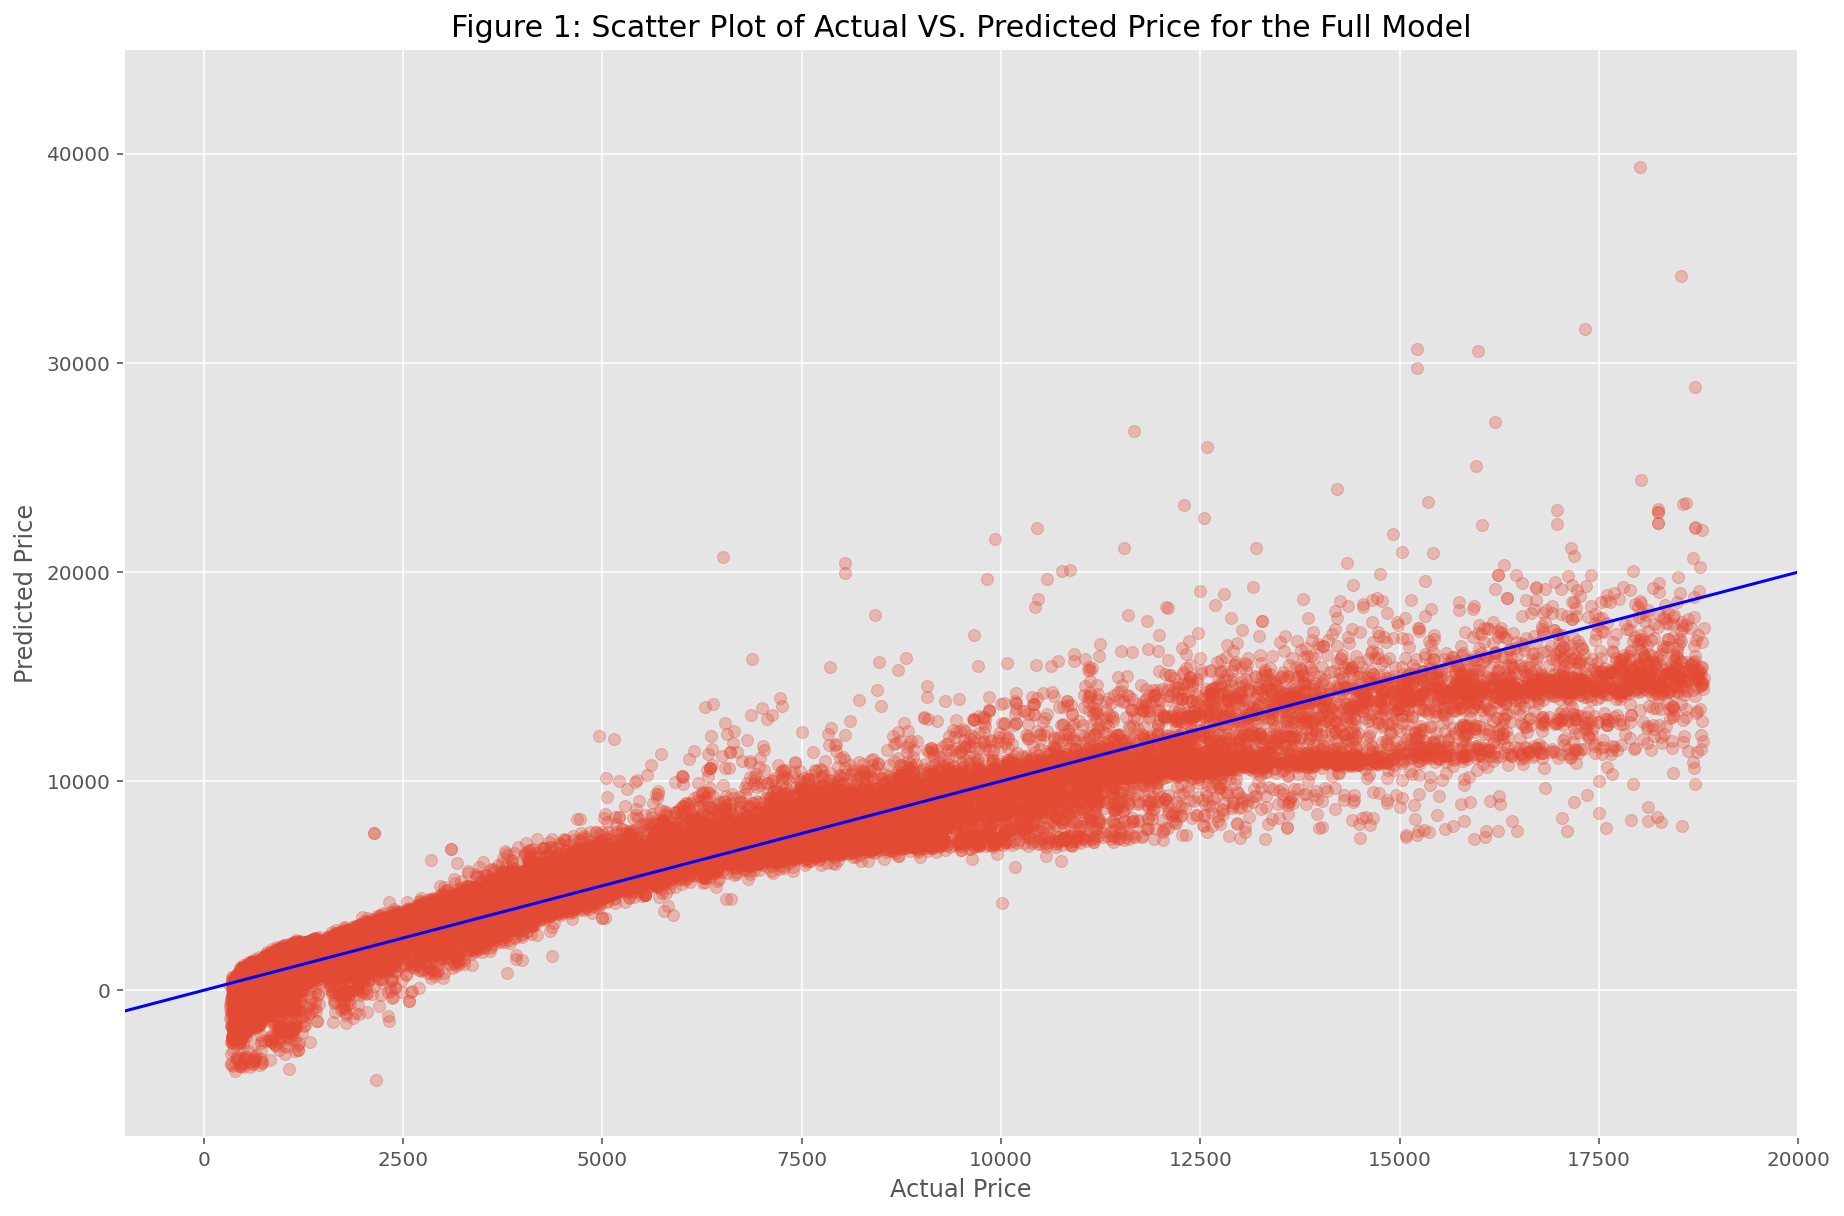

In [9]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3)
plt.xlim(-1000, 20000)
plt.ylim(-7000, 45000)
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Figure 1: Scatter Plot of Actual VS. Predicted Price for the Full Model', fontsize=15)
plt.show()

<a id="diagnostic-check"></a><h4>Full Model Diagnostic Checks</h4>

Multiple linear regression model has 4 conditions to satisfy:
- __Linearity__: Each variable is linearly related to the outcome
- __Nearly Normal Residuals__: Residuals of model nearly normal
- __Constant Variability__: Variability of residuals is nearly constant
- __Indepedence of Residuals__: Residuals are independent

Diagnostic checks are perform below to determine the validity of the model.

<h5>Linearity</h5>
From Figure 2, we see that the residual plot shows a negative trend because as the predicted price goes higher, the residuals decreases. Next, we will create a scatter plot of residuals and the actual diamond prices. Note that we use residual value instead of the predicted value on the y-axis so that we can still check for linearity without worrying about other possible violations like collinearity between the predictors.

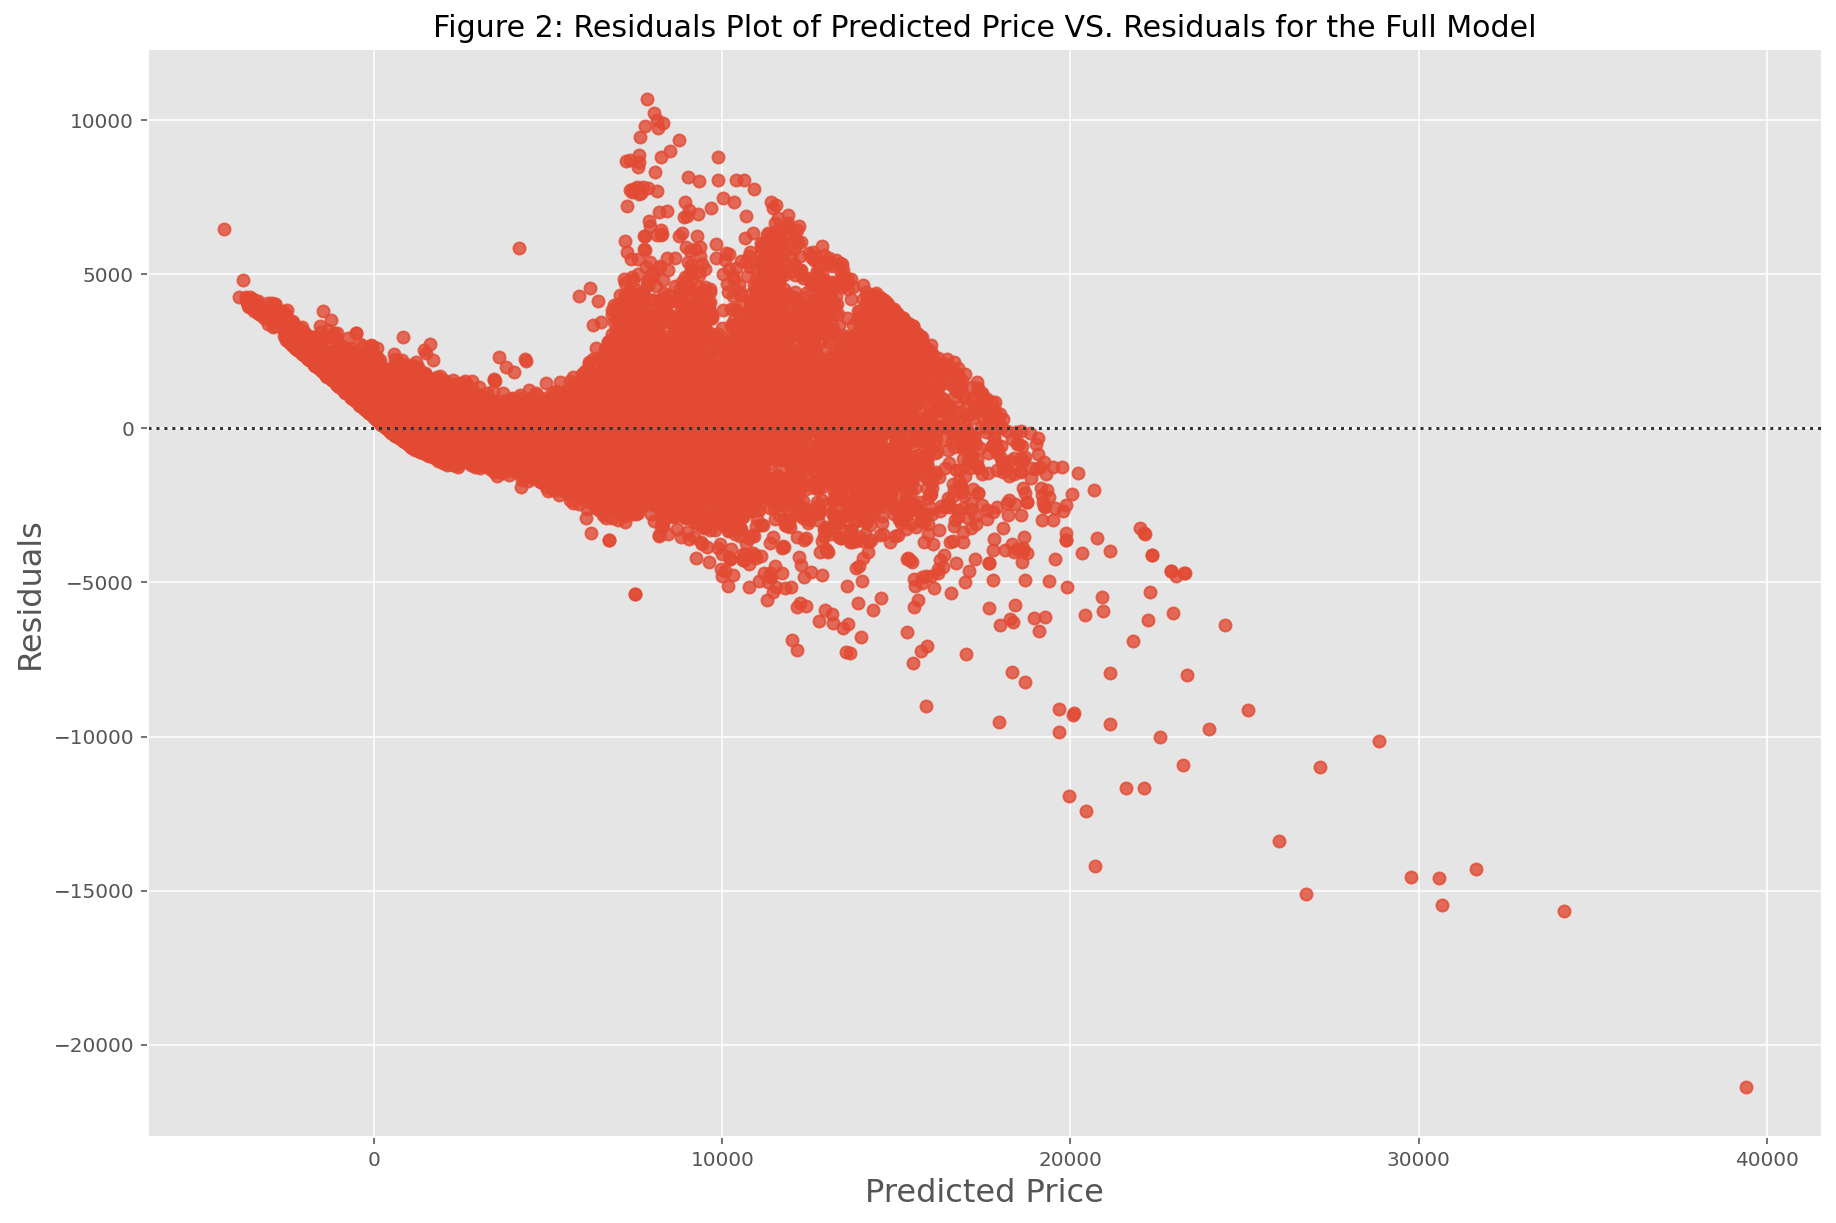

In [10]:
plt.figure(figsize=(15,10))
sns.residplot(x = residuals_full['predicted'], y = residuals_full['residual'])
plt.xlabel('Predicted Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Figure 2: Residuals Plot of Predicted Price VS. Residuals for the Full Model', fontsize=15)
plt.show();

From Figure 3, we see that the residual plot shows a negative trend because as the predicted price goes higher, the residuals decreases. Next, we will create a scatter plot of residuals and the actual diamond prices. Note that we use residual value instead of the predicted value on the y-axis so that we can still check for linearity without worrying about other possible violations like collinearity between the predictors.

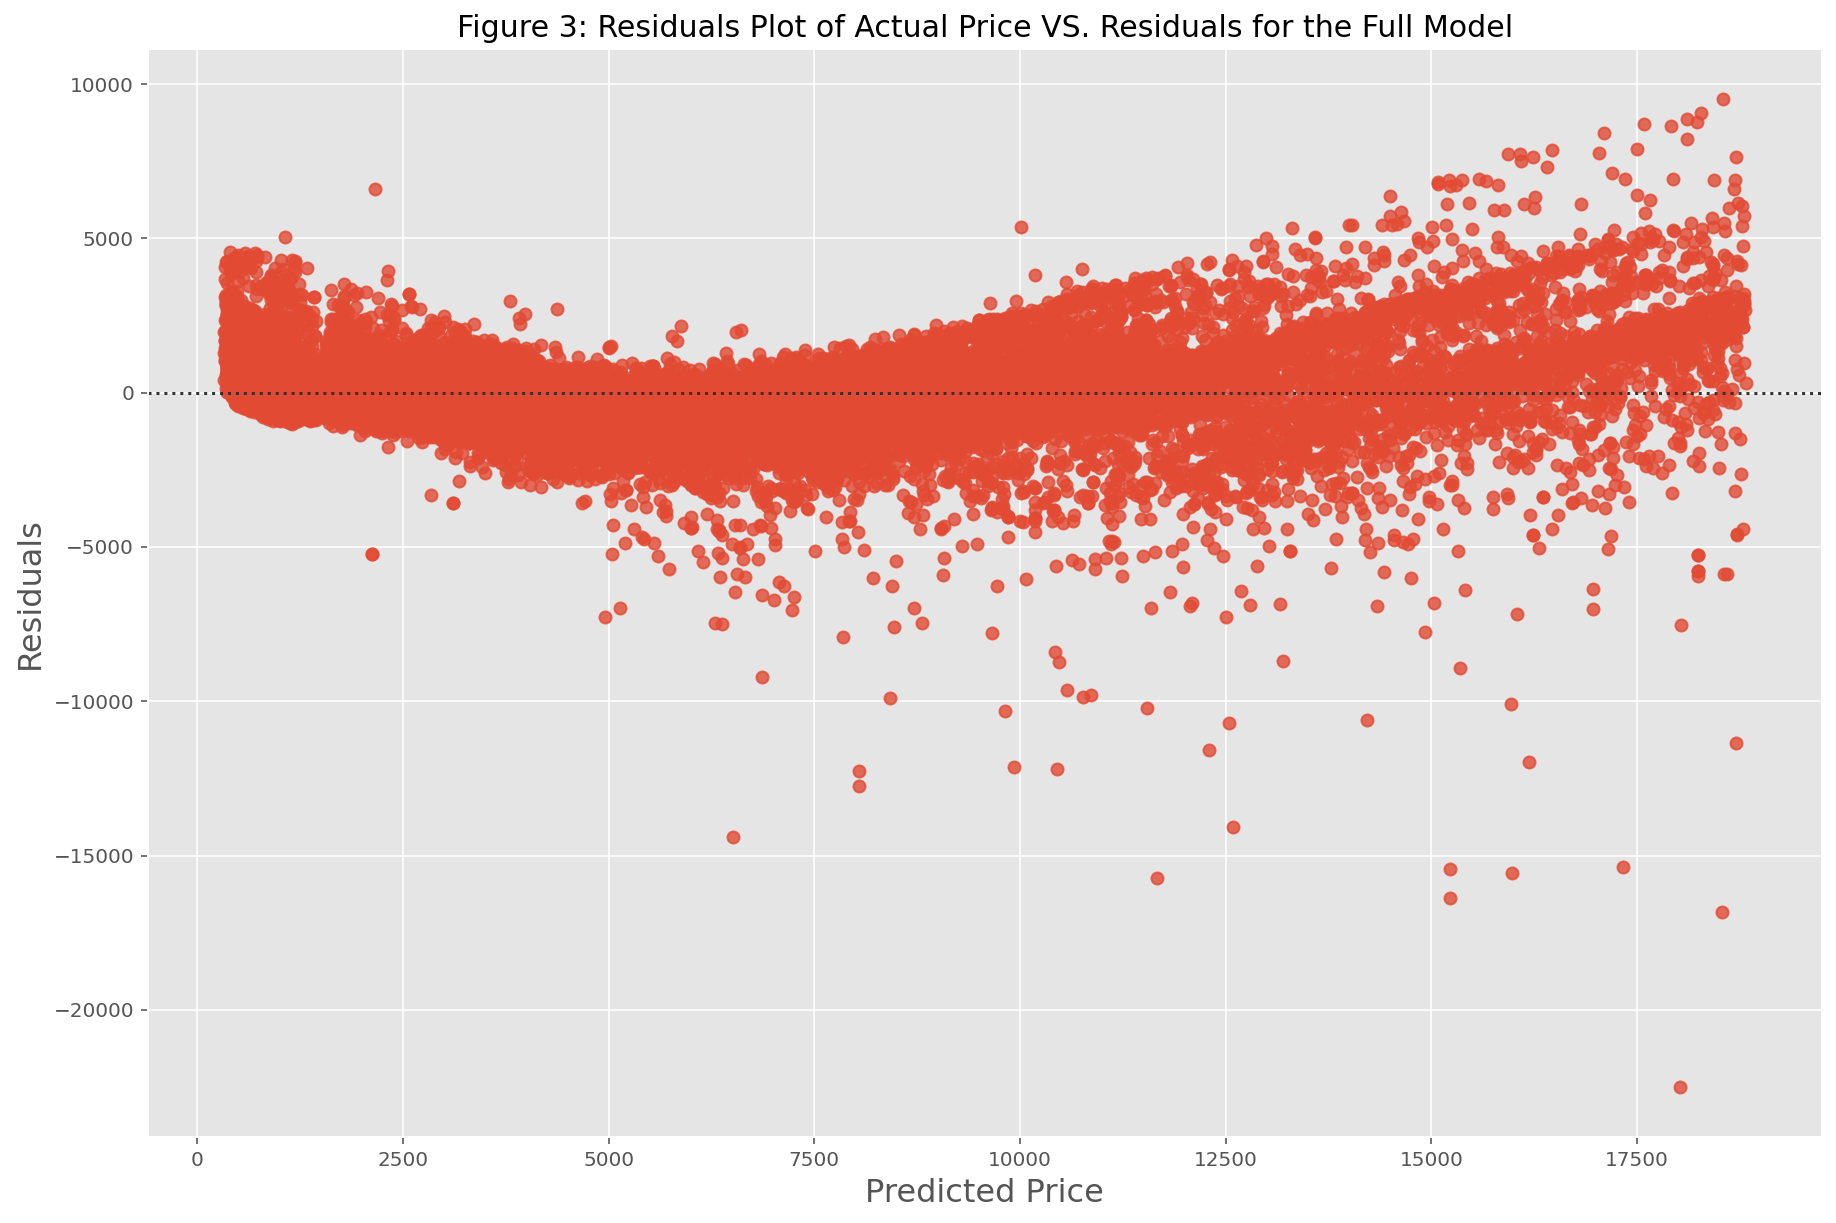

In [11]:
plt.figure(figsize=(15,10))
sns.residplot(x = residuals_full['actual'], y = residuals_full['residual'])
plt.xlabel('Predicted Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Figure 3: Residuals Plot of Actual Price VS. Residuals for the Full Model', fontsize=15)
plt.show();

<h5>Nearly Normal Residuals</h5>
From Figure 4,

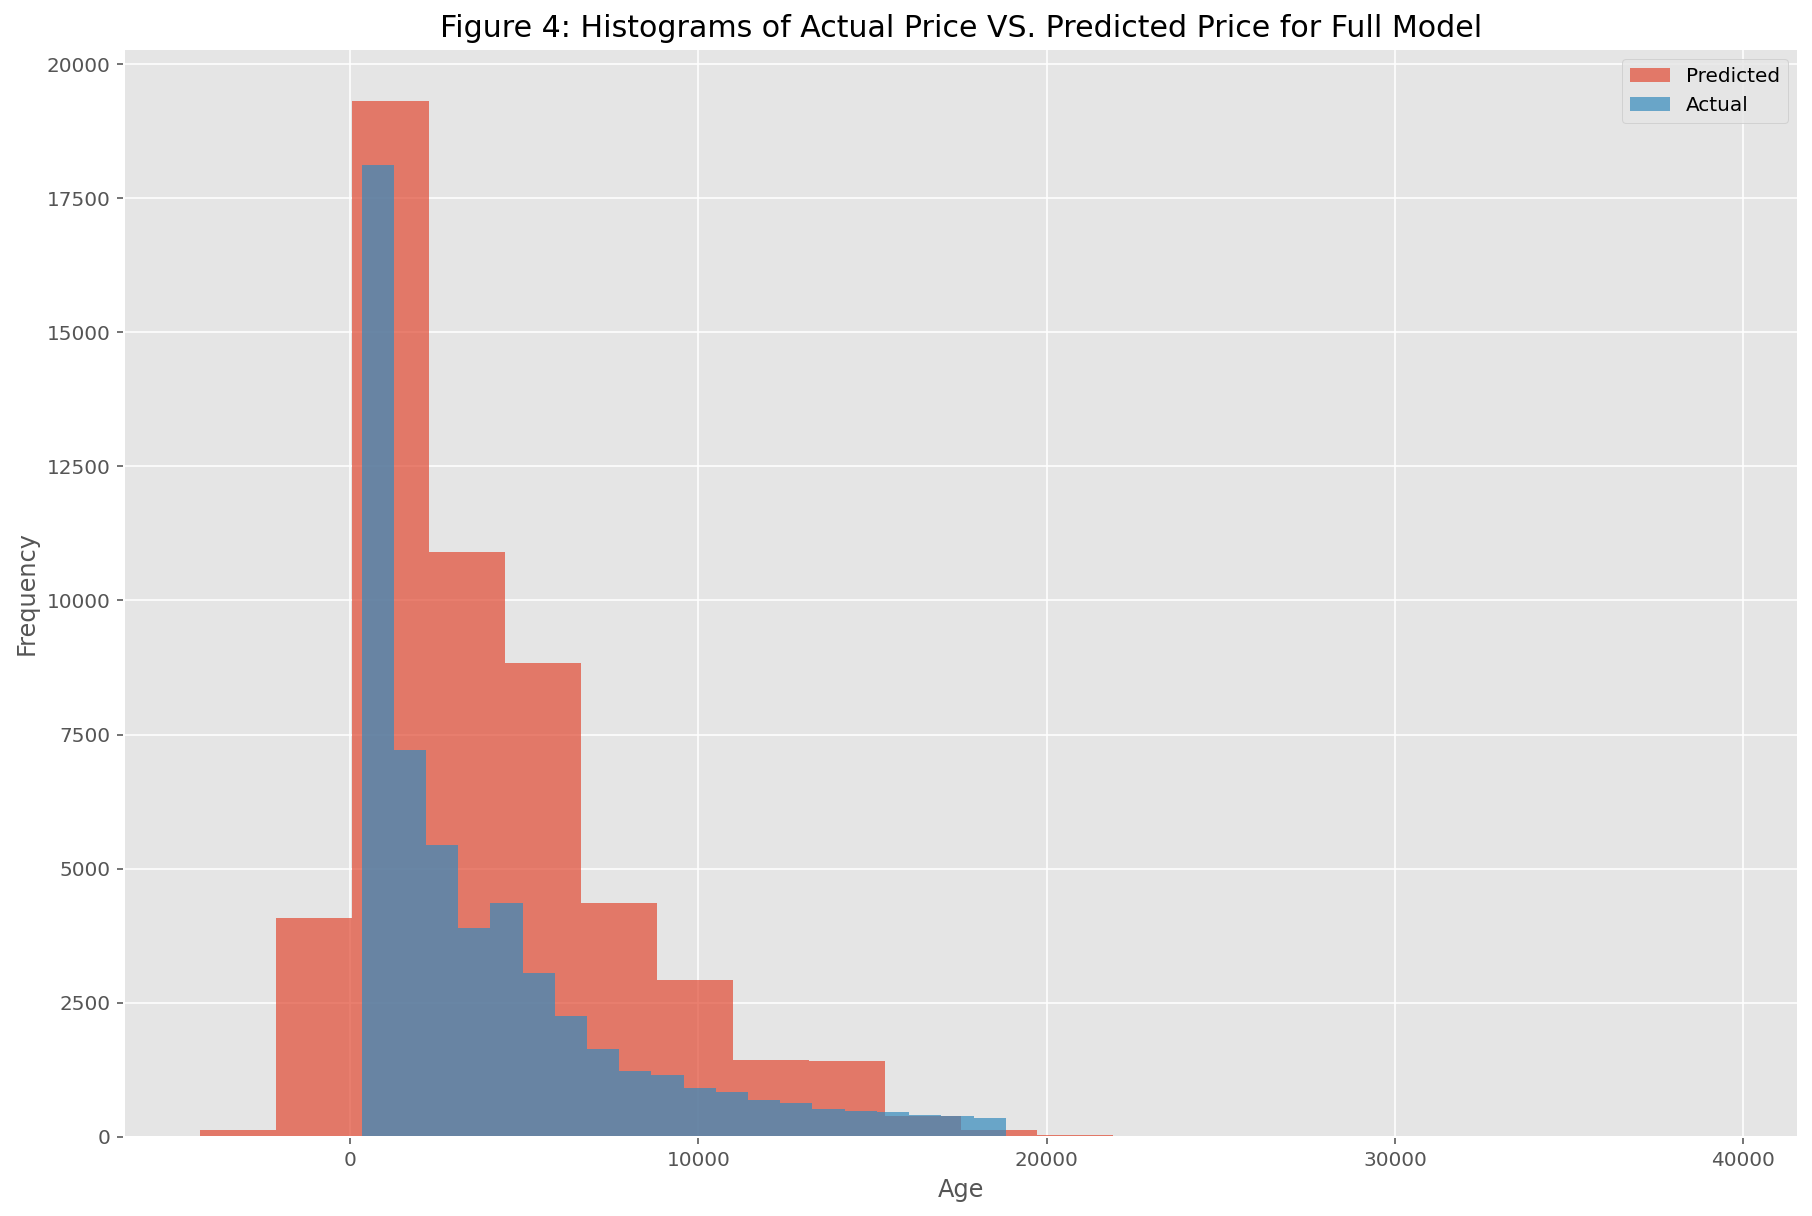

In [12]:
plt.figure(figsize=(15,10))
plt.hist(residuals_full['predicted'], label='Predicted', bins=20, alpha=0.7);
plt.hist(residuals_full['actual'], label='Actual', bins=20, alpha=0.7);
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Figure 4: Histograms of Actual Price VS. Predicted Price for Full Model', fontsize=15);
plt.legend()
plt.show();

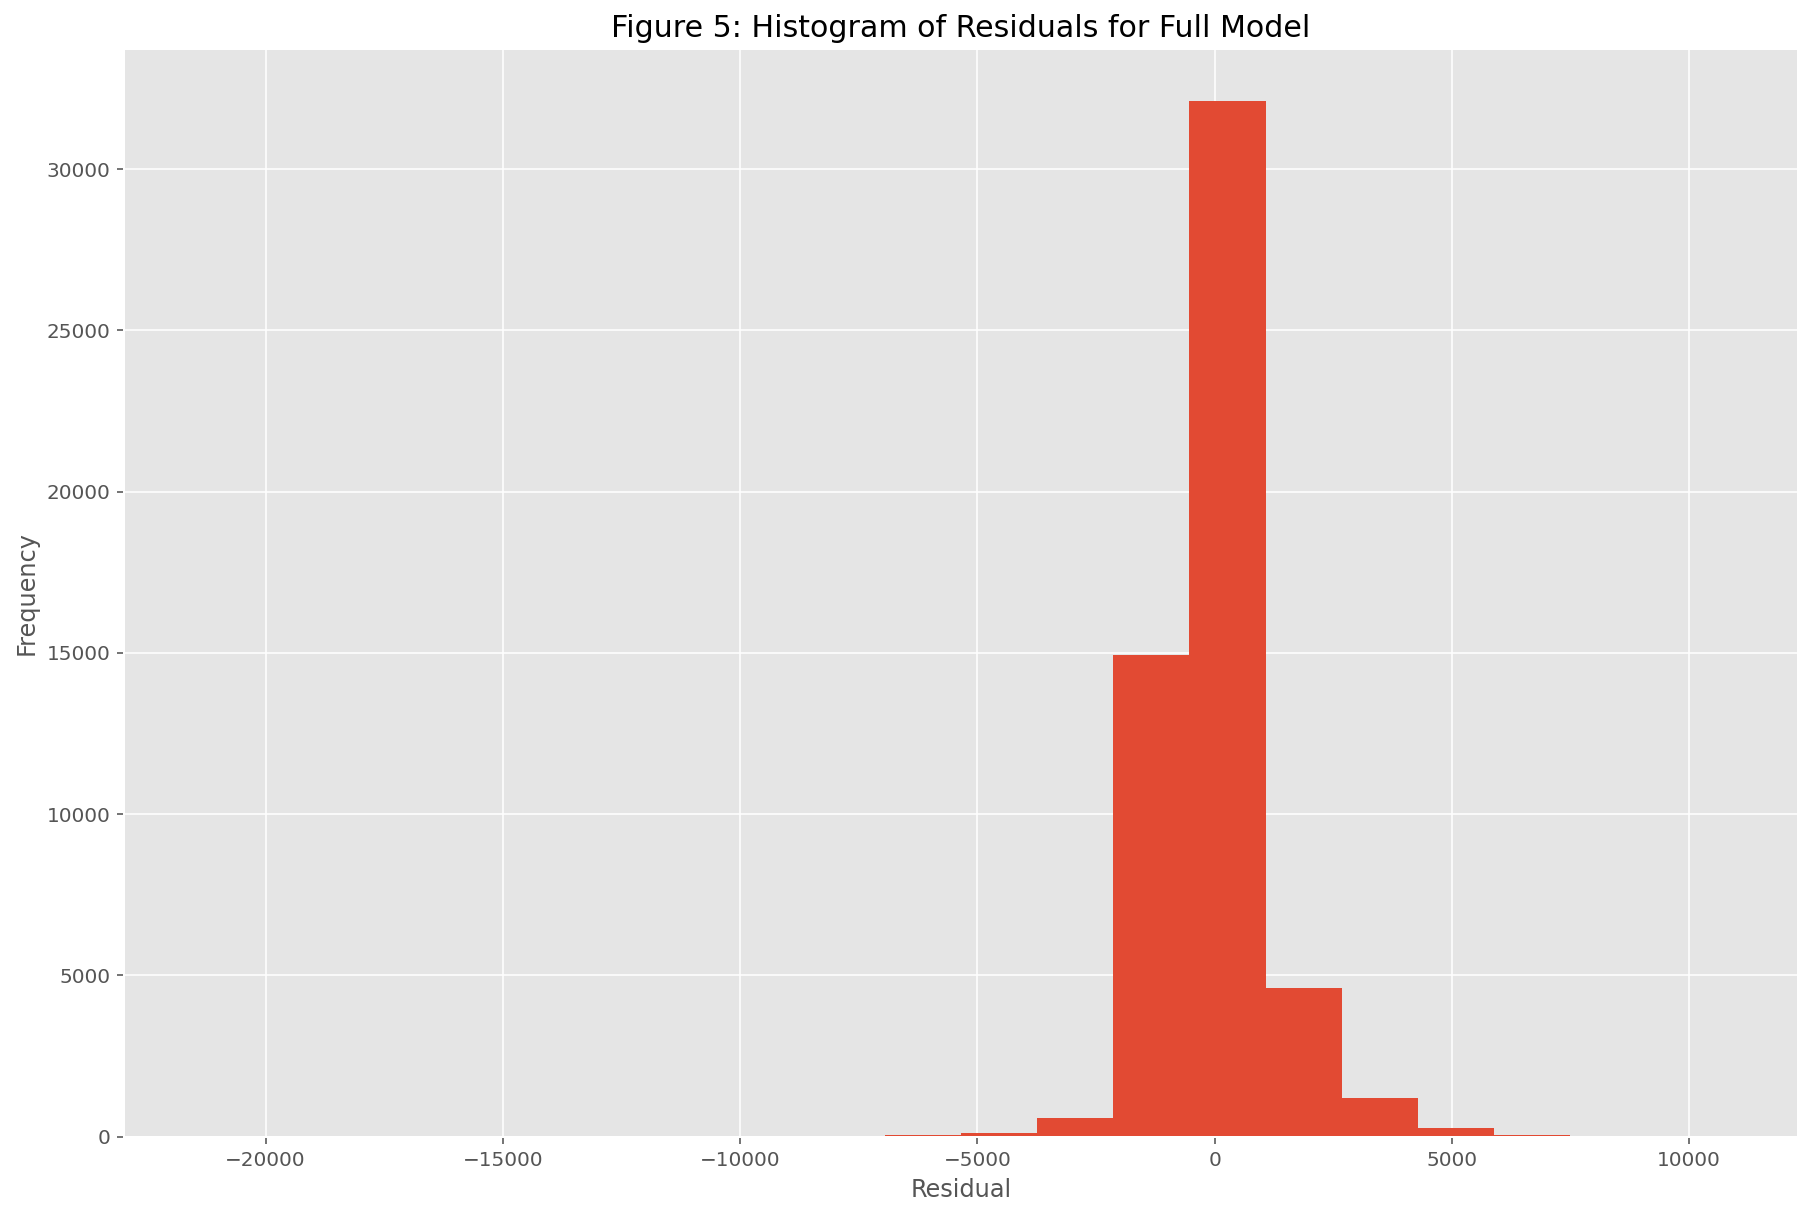

In [19]:
plt.figure(figsize=(15,10))
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of Residuals for Full Model', fontsize=15);
plt.show();

<a id="backward-selection"></a><h4>Backward Feature Selection</h4>
Using p-values, we now perform backwards feature selection. <mark>Statsmodels</mark> does not appear to have any canned code for automatic feature selection, so we wrote our own.

In [14]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = full_model_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "width" with p-value 0.6192

Removing term "depth" with p-value 0.1488

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:05:57   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>

<a id="reduce-overview"></a><h4>Reduced Model Overview</h4>
Let's create a new data frame for actual price vs predicted price and the residuals for the reduced model, just as we did for the Full Model Overview.

In [15]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,326,-1346.614726,1672.614726
1,326,-662.895014,988.895014
2,327,215.495406,111.504594
3,334,-830.942042,1164.942042
4,335,-3460.396928,3795.396928
5,336,-1382.081003,1718.081003
6,336,-398.775782,734.775782
7,337,-1073.647468,1410.647468
8,337,-1044.665285,1381.665285
9,338,-418.429847,756.429847


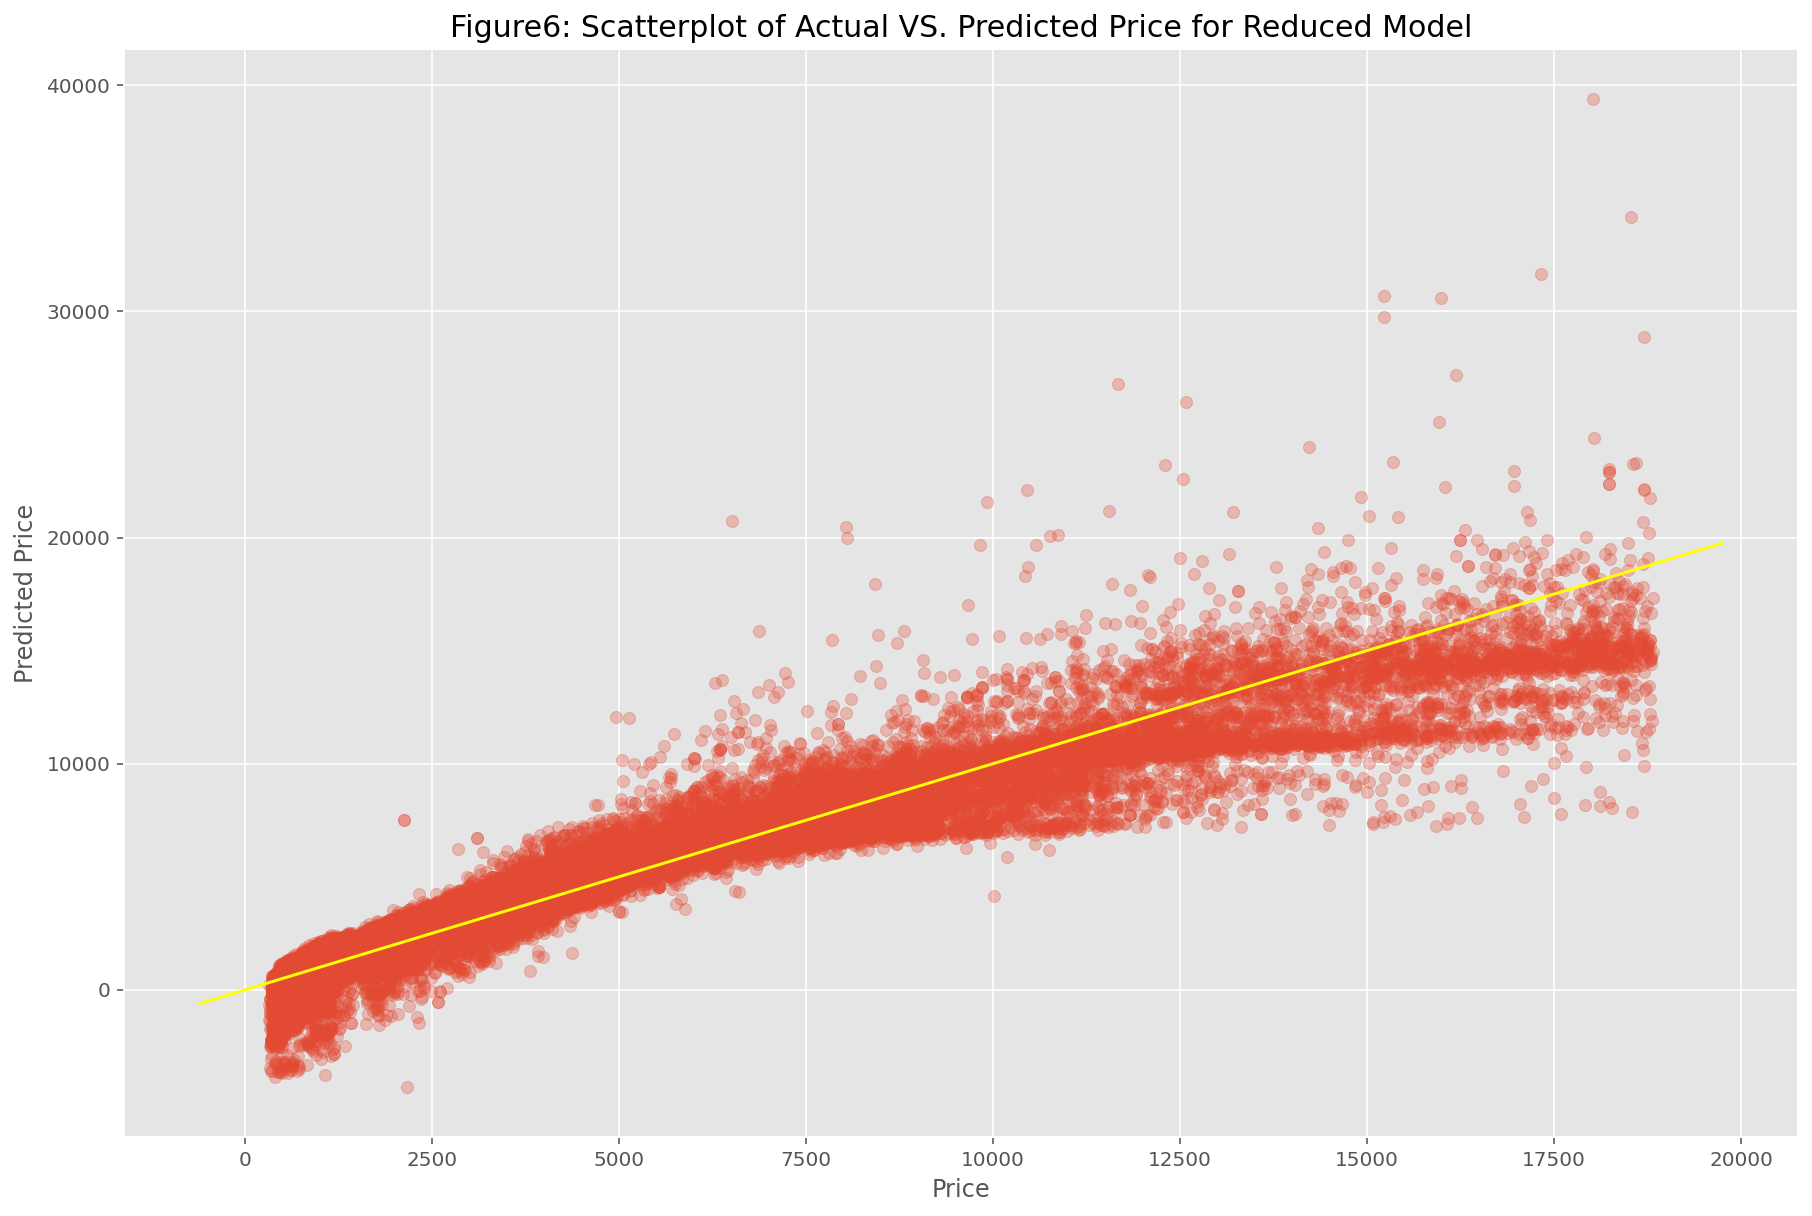

In [20]:
# get a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="yellow");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 6: Scatterplot of Actual VS. Predicted Price for Reduced Model', fontsize=15);
plt.show(); 

This model returns an Adjusted R-squared of 0.92, indicating that 92% of the variance is explained by the reduced model, but with 2 less variable. The p-values show that, as predicted, all of them are significant at the 5% level. Figure 13 shows that our model still has the same problems. In other words, the model exaggerates younger ages while underestimating older ages. The diagnostic tests will now be run on this reduced model.

<a id="reduce-diagnostic"></a><h4>Reduced Model Diagnostic Checks</h4>
Let's first get a scatter plot of residuals (as a function of predicted price).

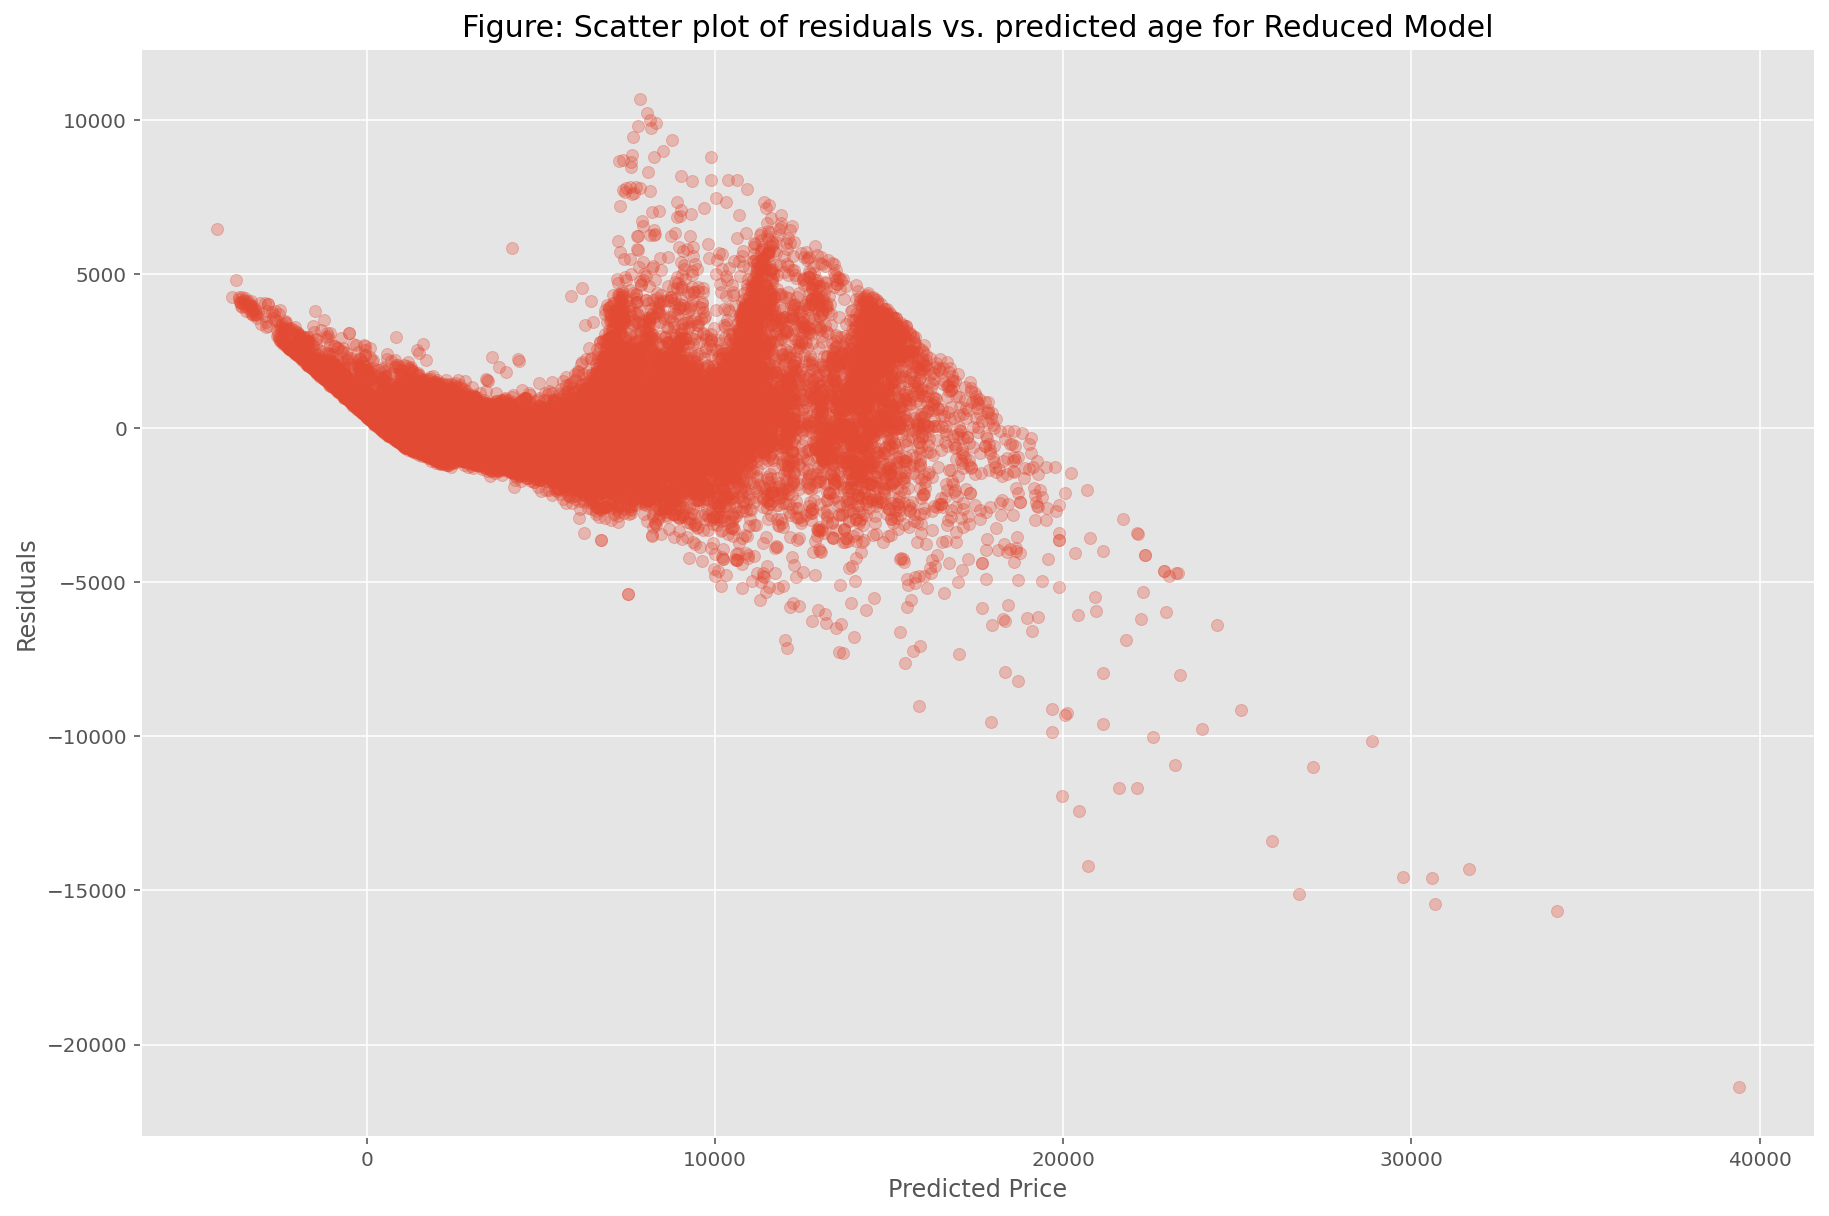

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure: Scatter plot of residuals vs. predicted age for Reduced Model', fontsize=15)
plt.show();

Figure 14 and Figure 10(a) have a striking resemblance, indicating that the residuals have the same banding pattern. Let's now have look at the histogram of the residuals for the reduced model.

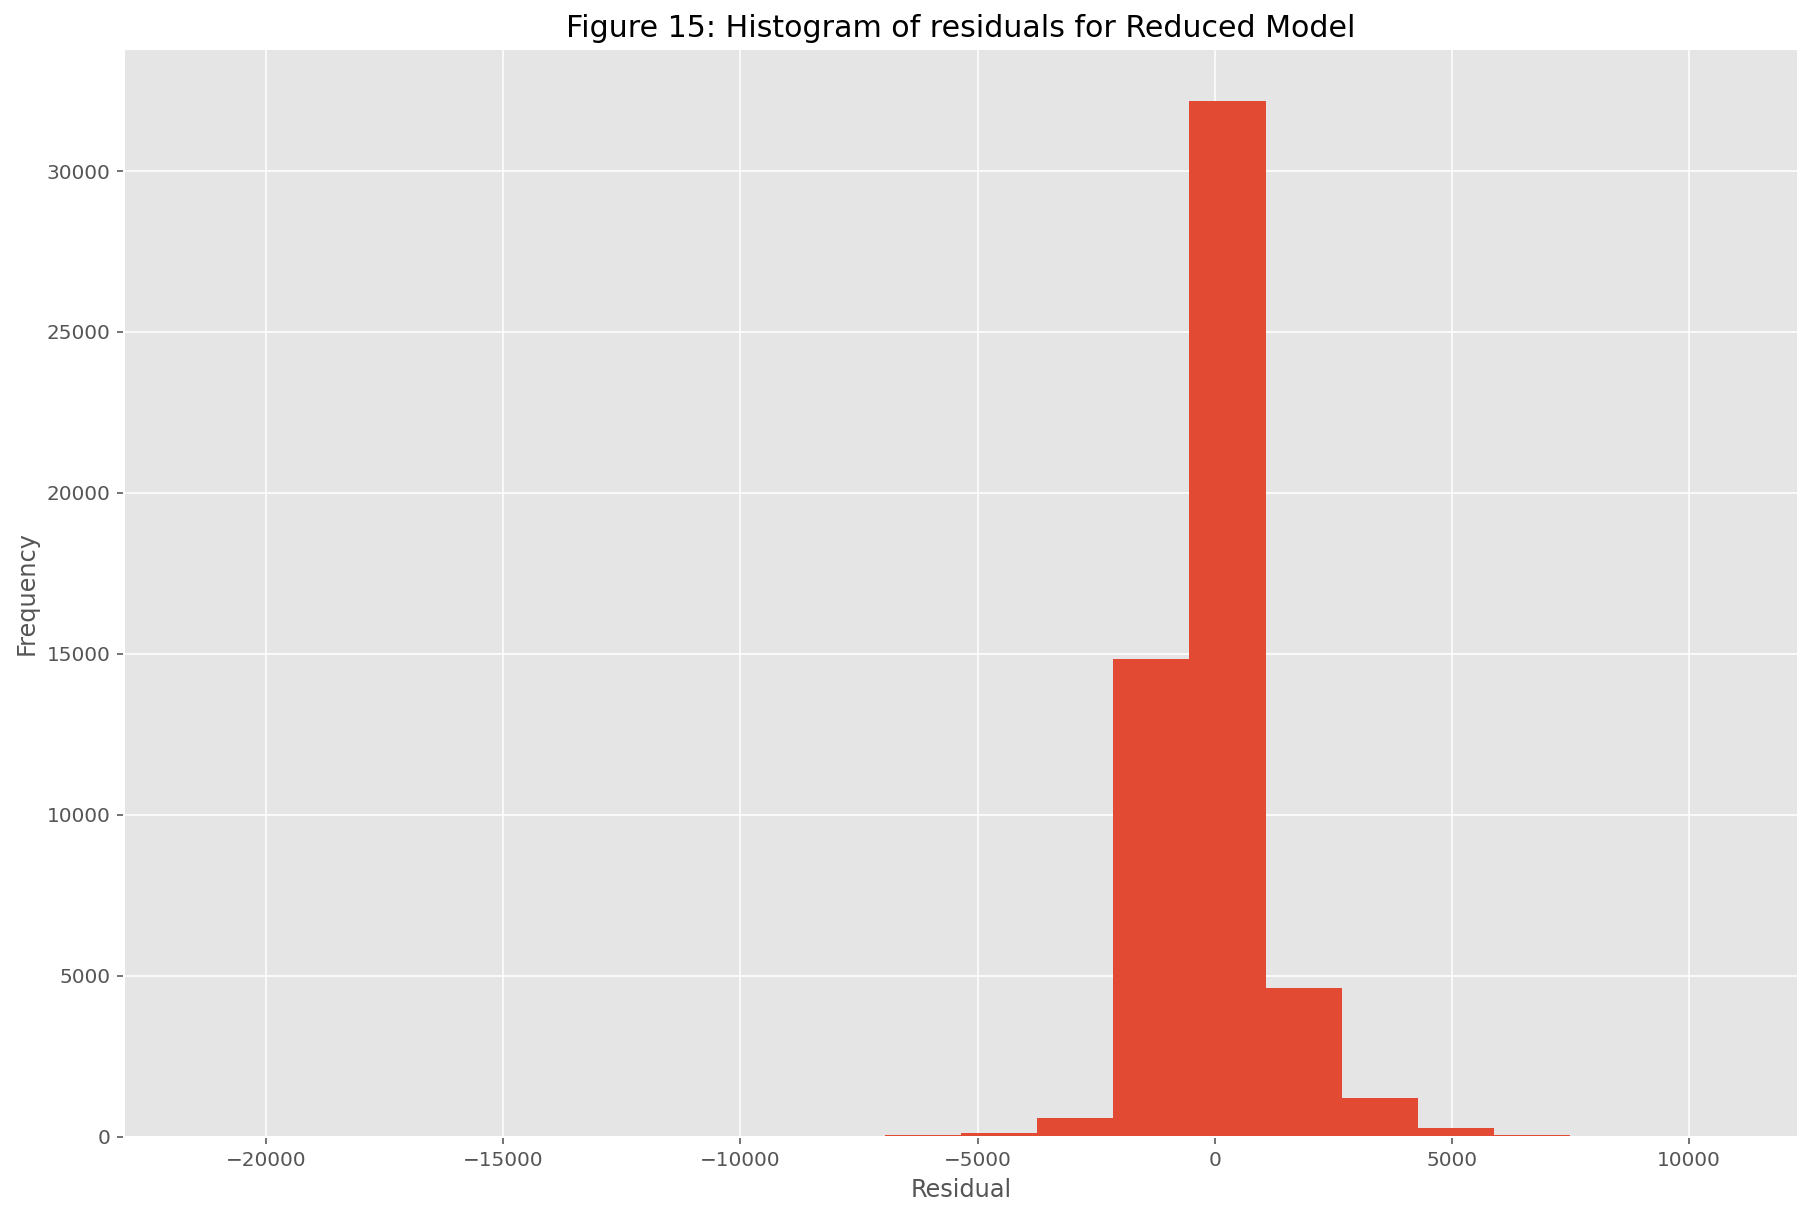

In [18]:
plt.figure(figsize=(15,10))
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 15, the histogram is unimodal. The residuals have a peak around 1000 and it is left skewed.

<a id="critique-limitation"></a><h3><b>Critique and Limitations</b></h3>

<a id="summary-and-conclusion"></a><h3><b>Summary and Conclusions</b></h3>
<a id="project-summary"></a><h4>Project Summary</h4>

<a id="summary-findings"></a><h4>Summary of Findings</h4>

<a id="conclusions"></a><h4>Conclusions</h4>

<a id="references"></a><h3><b>References</b></h3>
<ul>
    <li>Akman, D., Yenice, Z., Wong, Y. K., Ture, I., & Malekipirbazari, M. (n.d). <i>Regression Case Study: Predicting Age in Census Data</i>. Retrieved October 19, 2022, from <a href="https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-predicting-age-in-census-data/#Statistical-Modeling-and-Performance-Evaluation">https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-predicting-age-in-census-data/#Statistical-Modeling-and-Performance-Evaluation</a></li>
    <li>GeeksforGeeks (2022). <i>Interpreting the results of Linear Regression using OLS Summary</i>. Retrieved October 19, 2022, from <a href="https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/">https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/</a></li>
</ul>